In [1]:
# 라이브러리 불러오기
import urllib.request 
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xmltodict
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# 0. 가설 설정

- H0 : 코로나 전후(19년도 기준) 서울 부산간 소요시간의 차이가 없다.

- H1 : 코로나 전후(19년도 기준) 서울 부산간 소요시간의 차이가 있다.

# 1. 데이터 불러오기

In [2]:
# 영업소 데이터 불러오기
df_tc = pd.read_csv('ETC_75_04_01_508072.csv', encoding = 'cp949')
df_tc

,영업소코드,영업소명,고속도로운영기관구분코드,TCS노선번호,TCS본부코드,TCS지사코드,영업형태구분코드,영업방식구분코드,전화번호,가동영업소여부,입구차로수,출구차로수,가변차로수,민자마지막IC여부,가상영업소여부
0,0,미지정(입구),,,,,0,0,NaN,,0,0,0,N,Y
1,21,수원장안,67,,977,907700,1,2,1877-1790(1),Y,4,4,0,N,N
2,22,조원,67,,977,907700,1,2,1877-1790(1),Y,4,4,0,N,N
3,47,한밭,66,,976,906600,1,2,042-670-2700,Y,7,7,0,N,N
4,48,대화,66,,976,906600,1,2,042-670-2700,Y,4,4,0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,776,연경,00,700,905,610200,0,2,053-717-2787,Y,5,15,1,N,N
931,777,파군재,00,700,905,610200,0,2,053-717-2788,Y,5,15,1,N,N
932,778,둔산,00,700,905,610200,0,2,053-717-2789,Y,5,15,1,N,N
933,779,율암,00,700,905,610200,0,2,053-717-2783,Y,5,15,1,N,N


In [3]:
# 필요한 영업소 코드 

# 서울 => 101
# 부산 => 140
df_tc[(df_tc['영업소명'] == '부산') | (df_tc['영업소명'] == '서울')]

,영업소코드,영업소명,고속도로운영기관구분코드,TCS노선번호,TCS본부코드,TCS지사코드,영업형태구분코드,영업방식구분코드,전화번호,가동영업소여부,입구차로수,출구차로수,가변차로수,민자마지막IC여부,가상영업소여부
57,101,서울,00,001,901,210300,0,2,031-327-2124,Y,13,38,0,N,N
87,140,부산,00,001,906,710900,0,2,051-793-2882,Y,12,19,0,N,N


- 연도별 데이터 불러오기

In [4]:
columns = ['집계일자', '집계시', '출발영업소코드', '도착영업소코드', 'TCS차종구분코드', '통행시간']

In [5]:
tra_2016 = pd.read_csv('TCS_11_03_01_613452.txt', sep = '|', header = None)
tra_2016.drop(6, axis = 1, inplace= True)
tra_2016.columns = columns
tra_2016

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20160914,19,0,101,3,-1
1,20160914,19,0,101,6,-1
2,20160914,19,0,101,1,-1
3,20160914,17,0,101,6,-1
4,20160914,17,0,101,3,-1
...,...,...,...,...,...,...
681055,20160914,12,674,116,6,15659
681056,20160914,11,123,626,1,5221
681057,20160914,18,523,214,1,6433
681058,20160914,20,204,223,1,9249


In [6]:
tra_2017 = pd.read_csv('TCS_11_03_01_501144.txt', sep = '|', header = None)
tra_2017.drop(6, axis = 1, inplace= True)
tra_2017.columns = columns
tra_2017

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20171003,9,0,101,3,-1
1,20171003,9,0,101,1,-1
2,20171003,9,0,101,2,-1
3,20171003,9,0,101,6,-1
4,20171003,15,0,101,3,-1
...,...,...,...,...,...,...
777996,20171003,13,282,580,1,11512
777997,20171003,4,212,109,1,8726
777998,20171003,9,536,140,1,9562
777999,20171003,3,199,685,6,5080


In [7]:
tra_2018 = pd.read_csv('TCS_11_03_01_302621.txt', sep = '|', header = None)
tra_2018.drop(6, axis = 1, inplace= True)
tra_2018.columns = columns
tra_2018

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20180923,17,0,101,6,-1
1,20180923,17,0,101,1,-1
2,20180923,17,0,101,3,-1
3,20180923,13,0,101,4,-1
4,20180923,13,0,101,1,-1
...,...,...,...,...,...,...
748386,20180923,5,542,252,1,13139
748387,20180923,8,211,522,2,1625
748388,20180923,13,196,588,1,8198
748389,20180923,19,149,135,6,3434


In [8]:
tra_2019 = pd.read_csv('TCS_11_03_01_142612.txt', sep = '|', header = None)
tra_2019.drop(6, axis = 1, inplace= True)
tra_2019.columns = columns
tra_2019

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20190912,17,0,101,1,-1
1,20190912,17,0,101,3,-1
2,20190912,10,0,101,3,-1
3,20190912,10,0,101,1,-1
4,20190912,6,0,101,3,-1
...,...,...,...,...,...,...
819511,20190912,14,254,520,3,12215
819512,20190912,18,216,128,1,5974
819513,20190912,6,269,244,1,5493
819514,20190912,13,119,295,1,9758


In [9]:
tra_2020 = pd.read_csv('TCS_11_03_01_445478.csv', encoding  = 'cp949')
tra_2020.drop('Unnamed: 6', axis = 1, inplace= True)
tra_2020

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20200930,10,0,101,3,-1
1,20200930,10,0,101,1,-1
2,20200930,22,0,101,1,-1
3,20200930,4,0,101,3,-1
4,20200930,17,0,101,3,-1
...,...,...,...,...,...,...
791181,20200930,13,179,555,1,5900
791182,20200930,14,243,238,1,2568
791183,20200930,17,627,623,6,2066
791184,20200930,12,154,673,1,5664


In [10]:
tra_2021 = pd.read_csv('TCS_11_03_01_494338.csv', encoding  = 'cp949')
tra_2021.drop('Unnamed: 6', axis = 1, inplace= True)
tra_2021

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20210920,20,0,101,3,-1
1,20210920,20,0,101,1,-1
2,20210920,20,0,101,2,-1
3,20210920,7,0,101,3,-1
4,20210920,7,0,101,1,-1
...,...,...,...,...,...,...
792192,20210920,7,142,516,1,9015
792193,20210920,8,154,260,1,6091
792194,20210920,5,129,192,1,8335
792195,20210920,9,673,152,1,5392


# 2. 데이터 전처리

- 연도별 데이터 프레임 합치기

- 코로나 전, 후 나누기

In [11]:
tra_tot_BC = pd.concat([tra_2016, tra_2017, tra_2018], axis = 0)
tra_tot_BC

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20160914,19,0,101,3,-1
1,20160914,19,0,101,6,-1
2,20160914,19,0,101,1,-1
3,20160914,17,0,101,6,-1
4,20160914,17,0,101,3,-1
...,...,...,...,...,...,...
748386,20180923,5,542,252,1,13139
748387,20180923,8,211,522,2,1625
748388,20180923,13,196,588,1,8198
748389,20180923,19,149,135,6,3434


In [12]:
tra_tot_AC = pd.concat([tra_2019, tra_2020, tra_2021], axis = 0)
tra_tot_AC

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20190912,17,0,101,1,-1
1,20190912,17,0,101,3,-1
2,20190912,10,0,101,3,-1
3,20190912,10,0,101,1,-1
4,20190912,6,0,101,3,-1
...,...,...,...,...,...,...
792192,20210920,7,142,516,1,9015
792193,20210920,8,154,260,1,6091
792194,20210920,5,129,192,1,8335
792195,20210920,9,673,152,1,5392


- 서울 부산간 데이터프레임 생성

In [13]:
tra_tot_BC = tra_tot_BC[(tra_tot_BC['출발영업소코드'] == 101) & (tra_tot_BC['도착영업소코드'] == 140)]

In [14]:
tra_tot_AC = tra_tot_AC[(tra_tot_AC['출발영업소코드'] == 101) & (tra_tot_AC['도착영업소코드'] == 140)]

- 통행시간 컬럼에 -1 입력된 행 제거

In [15]:
del_index = tra_tot_BC[tra_tot_BC['통행시간'] < 1000].index
tra_tot_BC.drop(index=del_index, axis = 0, inplace=True)
tra_tot_BC

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
7738,20160914,11,101,140,1,26061
7739,20160914,18,101,140,1,30443
7740,20160914,3,101,140,1,21373
7741,20160914,19,101,140,1,28841
7742,20160914,19,101,140,6,30194
...,...,...,...,...,...,...
14463,20180923,4,101,140,1,16897
14464,20180923,5,101,140,1,17130
688701,20180923,11,101,140,6,20590
689963,20180923,12,101,140,6,21817


In [16]:
del_index = tra_tot_AC[tra_tot_AC['통행시간'] < 1000].index
tra_tot_AC.drop(index=del_index, axis = 0, inplace=True)
tra_tot_AC

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
15490,20190912,16,101,140,1,31968
15491,20190912,16,101,140,6,32642
15492,20190912,11,101,140,1,25652
15493,20190912,10,101,140,1,24743
15494,20190912,6,101,140,1,26556
...,...,...,...,...,...,...
10206,20210920,17,101,140,1,19034
10207,20210920,15,101,140,1,18457
596103,20210920,5,101,140,1,14041
621167,20210920,12,101,140,1,16294


- 집계일자 컬럼 앞에서 4자리 슬라이싱 후 집계년도 컬럼 생성

In [17]:
tra_tot_AC['집계일자'] = tra_tot_AC['집계일자'].astype(str)
tra_tot_BC['집계일자'] = tra_tot_BC['집계일자'].astype(str)

In [18]:
tra_tot_AC['집계년도'] = tra_tot_AC['집계일자'].str[:4]
tra_tot_BC['집계년도'] = tra_tot_BC['집계일자'].str[:4]

# 3. 데이터 분석 및 시각화

- 코로나 전후 데이터프레임의 연도별 통행시간 평균

- 코로나 전후 데이터프레임의 각각 평균

In [19]:
tmp = tra_tot_BC.groupby(by = '집계년도', as_index = False)[['통행시간']].mean()

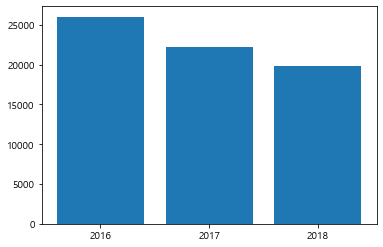

In [20]:
plt.bar(x = '집계년도', height = '통행시간', data = tmp)
plt.show()

In [21]:
tmp = tra_tot_AC.groupby(by = '집계년도', as_index = False)[['통행시간']].mean()

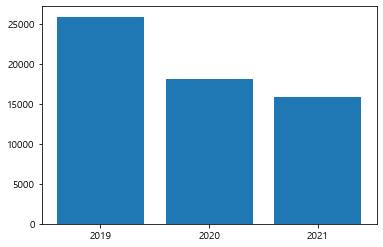

In [22]:
plt.bar(x = '집계년도', height = '통행시간', data = tmp)
plt.show()

In [23]:
tmp_list = []
tmp = tra_tot_BC.groupby(by = '집계년도', as_index = False)[['통행시간']].mean()['통행시간'].mean()
tmp_list.append(tmp)

In [24]:
tmp = tra_tot_AC.groupby(by = '집계년도', as_index = False)[['통행시간']].mean()['통행시간'].mean()
tmp_list.append(tmp)

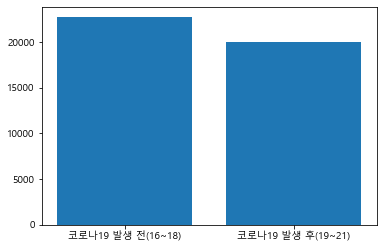

In [25]:
plt.bar(x = ['코로나19 발생 전(16~18)', '코로나19 발생 후(19~21)'], height=tmp_list)
plt.show()

In [40]:
aa = tmp_list[0] - tmp_list[1]
print(round(aa / 60, 3))

45.29


# 4. 결론

### -> **코로나 전에 비하여 코로나 후 3년간 평균 45.3분 정도 서울-부산 간 소요시간이 단축.**

- 코로나 이후 집합 금지 혹은 여러명의 사람이 모이는 것을 꺼려하기 때문으로 추측된다.

- 또한, 명절임에도 고령인구를 만나는 것을 코로나로 인하여 꺼려하는 것으로 추측된다.

# 5. 추가 분석 사항

- 올해(2022)년도 서울-부산 간 소요시간 예측

- 정오(12시) 기준

- 코로나 일일 확진자 수에 따른 이동시간 차이

In [47]:
# 라이브러리 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# 인증키와 주소
key = 'mOX2kpzH42CzIPKdgYi75HQ6pkdETp%2BWe%2FS30VoA2VMdppX5dP21a1mOYW32hWJH1u0nF3%2BDc6Tkh8%2FBn4HBlw%3D%3D'
start = 1
numOfRows = 5000 # 데이터 가져올 개수
rc_year = 2020
rc_month = i
#     rc_date = 20200221
url = f' https://apis.data.go.kr/B551015/API214/RaceDetailResult?serviceKey={key}&pageNo={start}&numOfRows={numOfRows}&rc_year={rc_year}&rc_month={rc_month}' #&rc_year={rc_year}&rc_month={rc_month}&rc_date={rc_date}
# https://apis.data.go.kr/B551015/API214/RaceDetailResult?serviceKey=mOX2kpzH42CzIPKdgYi75HQ6pkdETp%2BWe%2FS30VoA2VMdppX5dP21a1mOYW32hWJH1u0nF3%2BDc6Tkh8%2FBn4HBlw%3D%3D&pageNo=1&numOfRows=10&rc_year=2016

# 데이터 가져오기
response = urllib.request.urlopen(url) 

# xml --> dict
xml_parse = xmltodict.parse(response)
xml_dict = json.loads(json.dumps(xml_parse))
result = xml_dict['response']['body']['items']['item']  # 데이터 부분 딕셔너리 키 확인 필요

# 데이터프레임으로 변환
race = pd.json_normalize(result)

# 확인
race

# 저장
race.to_csv(f'C:\\Users\\User\\Desktop\\KT_DXT\\horse_racing\\data\\race{rc_month}.csv')
print(f'{rc_month} 파일 저장 완료')

## 1) 데이터 불러오기

In [48]:
tra_tot = pd.concat([tra_2016, tra_2017, tra_2018, tra_2019, tra_2020, tra_2021], axis = 0)
tra_tot

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20160914,19,0,101,3,-1
1,20160914,19,0,101,6,-1
2,20160914,19,0,101,1,-1
3,20160914,17,0,101,6,-1
4,20160914,17,0,101,3,-1
...,...,...,...,...,...,...
792192,20210920,7,142,516,1,9015
792193,20210920,8,154,260,1,6091
792194,20210920,5,129,192,1,8335
792195,20210920,9,673,152,1,5392


## 2) 데이터 전처리

In [49]:
del_index = tra_tot[tra_tot['통행시간'] < 1000].index
tra_tot.drop(index=del_index, axis = 0, inplace=True)
tra_tot

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
14128,20160914,1,101,625,1,21004
14129,20160914,14,101,625,1,26025
14130,20160914,9,101,625,1,19113
14131,20160914,0,101,625,1,21688
14133,20160914,3,101,625,1,19745
...,...,...,...,...,...,...
792191,20210920,22,235,151,1,6915
792192,20210920,7,142,516,1,9015
792193,20210920,8,154,260,1,6091
792194,20210920,5,129,192,1,8335


In [122]:
tra_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812853 entries, 14128 to 792196
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   집계일자       812853 non-null  int64
 1   집계시        812853 non-null  int64
 2   출발영업소코드    812853 non-null  int64
 3   도착영업소코드    812853 non-null  int64
 4   TCS차종구분코드  812853 non-null  int64
 5   통행시간       812853 non-null  int64
dtypes: int64(6)
memory usage: 43.4 MB


In [126]:
tra_tot['집계일자'] = tra_tot['집계일자'].astype(str)

In [50]:
tra_tot.corr()

,집계일자,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
집계일자,1.000000,0.009451,0.105986,0.080107,0.009846,-0.115969
집계시,0.009451,1.000000,0.002063,-0.007954,0.027285,0.020375
출발영업소코드,0.105986,0.002063,1.000000,0.128225,0.020259,-0.071226
도착영업소코드,0.080107,-0.007954,0.128225,1.000000,0.009593,-0.005389
TCS차종구분코드,0.009846,0.027285,0.020259,0.009593,1.000000,-0.153601
통행시간,-0.115969,0.020375,-0.071226,-0.005389,-0.153601,1.000000


- 특수일 컬럼 생성위해 데이터 불러오기

In [99]:
tmp_df2021 = pd.read_csv('DSRC_28_07_04_295632.csv', encoding='cp949')
tmp_df2016 = pd.read_csv('DSRC_28_07_04_860591.csv', encoding='cp949')
tmp_df2018 = pd.read_csv('DSRC_28_07_04_679525.csv', encoding='cp949')
tmp_df2019 = pd.read_csv('DSRC_28_07_04_832300.csv', encoding='cp949')
tmp_df2020 = pd.read_csv('DSRC_28_07_04_756492.csv', encoding='cp949')
tmp_df2017 = pd.read_csv('DSRC_28_07_04_653431.csv', encoding='cp949')

In [110]:
tmp_df = pd.concat([tmp_df2016, tmp_df2017, tmp_df2018, tmp_df2019, tmp_df2020, tmp_df2021], axis= 0, ignore_index=True)
tmp_df

,구분,특수일전후특송기간범위구분코드,TCS차종구분명,TCS차종구분코드,TCS차종유형구분명,TCS차종유형구분코드,교통량,총통행시간,평균통행시간
0,D(20160101),4,1종,1,소형차,1,5803184,265242695,46
1,D(20160101),4,6종,6,소형차,1,289154,12069090,42
2,D(20160101),4,2종,2,중형차,2,66493,1723184,26
3,D(20160101),4,3종,3,대형차,3,160043,7168616,45
4,D(20160101),4,5종,5,대형차,3,37493,2142063,57
...,...,...,...,...,...,...,...,...,...
721,D-3(20210918),1,1종,1,소형차,1,7321265,301108979,41
722,D-3(20210918),1,2종,2,중형차,2,118141,2776890,24
723,D-3(20210918),1,3종,3,대형차,3,164982,6337062,38
724,D-3(20210918),1,5종,5,대형차,3,175959,8155152,46


In [111]:
tmp_df = tmp_df[['구분']]
tmp_df= tmp_df.drop_duplicates('구분')
tmp_df = tmp_df['구분'].str.split('(').str[1].str.replace(')','')
tmp_df = pd.DataFrame(tmp_df)

In [115]:
tmp_df.reset_index(drop=True, inplace=True)
tmp_df['특수일'] = 1
tmp_df

,구분,특수일
0,20160101,1
1,20160208,1
2,20160915,1
3,20160102,1
4,20160209,1
...,...,...
116,20210210,1
117,20210919,1
118,20201229,1
119,20210209,1


In [146]:
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   집계일자    121 non-null    object
 1   특수일     121 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [117]:
tmp_df.rename({'구분':'집계일자'}, axis = 1, inplace=True)

In [167]:
traffic = pd.merge(tmp_df, tra_tot, how = 'right',left_on='집계일자', right_on='집계일자')
traffic['특수일'].value_counts()

1.0    725954
Name: 특수일, dtype: int64

- 결측치 처리

- 휴일이 아닌 행 특수일 컬럼 0 처리

In [168]:
traffic.fillna(0.0, axis = 0, inplace = True)

In [169]:
traffic

,집계일자,특수일,집계시,출발영업소코드,도착영업소코드,TCS차종구분코드,통행시간
0,20160914,0.0,1,101,625,1,21004
1,20160914,0.0,14,101,625,1,26025
2,20160914,0.0,9,101,625,1,19113
3,20160914,0.0,0,101,625,1,21688
4,20160914,0.0,3,101,625,1,19745
...,...,...,...,...,...,...,...
812848,20210920,1.0,22,235,151,1,6915
812849,20210920,1.0,7,142,516,1,9015
812850,20210920,1.0,8,154,260,1,6091
812851,20210920,1.0,5,129,192,1,8335


In [165]:
traffic.drop(columns = '집계일자', 'TCS차종구분코드', axis = 1, inplace = True)

In [166]:
target = '통행시간'

x = traffic.drop(target, axis = 1)
y = traffic[target]

In [ ]:
# 가변수화
dumm_cols = ['']
x = get

In [162]:
# 7:3 분리
from sklearn.model_selection import train_test_split